# SWMAL Exercise

### MAL Group-Nr. 15
13-09-2025

| Name   | ID        |
|--------|-----------|                       
| John   | 202209849 |
| Khaled | 202307853 |
| Jahye  | 202309135 |

## Intro

### Qa) The $\theta$ parameters and the $R^2$ Score

In [9]:
# Solution for Qa: Extracting θ parameters and R² score

# 1. Extract θ₀ (intercept) and θ₁ (coefficient) from the trained linear regression model
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient

print(f" θ₀: {theta_0:.6f} (should be ≈ 4.85)")
print(f" θ₁: {theta_1:.8e} (should be ≈ 4.91e-05)")

# 2. Extract the R² score using the score method
r2_score = model.score(X, y)
print(f"R² score: {r2_score:.3f}")

# 3. Explanation of what R² measures
print("\nWhat R² Score Measures:")
print("R² (coefficient of determination) measures the proportion of variance")
print("in the dependent variable (y) that is predictable from the independent")
print("variable(s) (X).")
print("")
print("Formula: R² = 1 - (residual sum of squares) / (total sum of squares)")
print("         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²")
print("")
print("In our case: R² = 0.734 means that 73.4% of the variance in")
print("life satisfaction can be explained by GDP per capita.")

# 4. R² characteristics and interpretation
print("\nR² Characteristics:")
print("• Minimum value: -∞ (negative infinity)")
print("• Maximum value: 1.0")
print("• R² = 1.0: Perfect prediction (all variance explained)")
print("• R² = 0.0: Model performs as well as predicting the mean")
print("• R² < 0.0: Model performs worse than predicting the mean")
print("")
print("Higher R² is better:")
print("• R² is a Goodness/Fitness measure (not a loss/cost function)")
print("• We want R² to be as close to 1.0 as possible")


 θ₀: 4.853053 (should be ≈ 4.85)
 θ₁: 4.91154459e-05 (should be ≈ 4.91e-05)
R² score: 0.734

What R² Score Measures:
R² (coefficient of determination) measures the proportion of variance
in the dependent variable (y) that is predictable from the independent
variable(s) (X).

Formula: R² = 1 - (residual sum of squares) / (total sum of squares)
         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²

In our case: R² = 0.734 means that 73.4% of the variance in
life satisfaction can be explained by GDP per capita.

R² Characteristics:
• Minimum value: -∞ (negative infinity)
• Maximum value: 1.0
• R² = 1.0: Perfect prediction (all variance explained)
• R² = 0.0: Model performs as well as predicting the mean
• R² < 0.0: Model performs worse than predicting the mean

Higher R² is better:
• R² is a Goodness/Fitness measure (not a loss/cost function)
• We want R² to be as close to 1.0 as possible


Why used:
```python
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient
```
Explanation: intercept_ returns an array even for single output, so we need [0]. coef_ returns a 2D array (for multiple features/outputs), so we need [0][0] to get the single coefficient.

### Qb) Using k-Nearest Neighbors

In [10]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [11]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


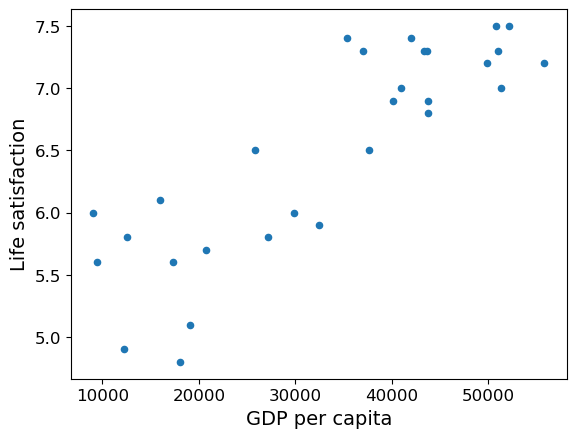

KNN prediction for Cyprus: 5.77
KNN R² score: 0.853
Linear regression prediction: 5.96
Linear regression R² score: 0.734


In [17]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y.ravel())

X_new = [[22587]]
y_pred_knn = knn.predict(X_new)
print(f"KNN prediction for Cyprus: {y_pred_knn[0]:.2f}")

knn_score = knn.score(X, y.ravel())
print(f"KNN R² score: {knn_score:.3f}")

print(f"Linear regression prediction: {y_pred[0][0]:.2f}")
print(f"Linear regression R² score: {model.score(X, y):.3f}")

Why used:

```python
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
```
Explanation: np.c_[] converts 1D pandas series to 2D column vector that sklearn expects. Sklearn models need 2D arrays (samples × features), not 1D arrays.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

KNN with k=1: R² score = 1.000
KNN with k=9: R² score = 0.784
KNN with k=29: R² score = -0.000


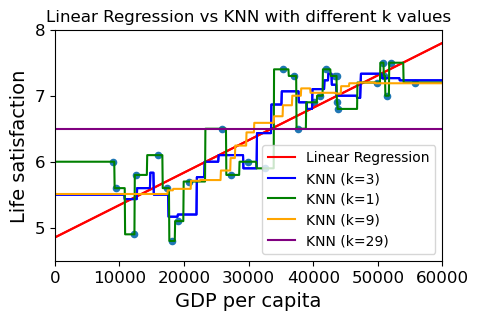


Why k=1 gets perfect score:
- k=1 uses only the nearest neighbor for prediction
- On training data, each point is its own nearest neighbor
- So it predicts itself perfectly = overfitting!
- For new data, k=1 would perform poorly
- Higher k values smooth predictions and generalize better


In [46]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 4.5, 8])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# Try different k values for KNN

k_values = [1, 9, 29]
colors = ['g', 'orange', 'purple']

# Add labels to existing plots
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")

# Test different k values
for k, color in zip(k_values, colors):
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(X, y.ravel())
    y_pred_temp = knn_temp.predict(M)
    plt.plot(m, y_pred_temp, color=color, label=f"KNN (k={k})")
    
    # Print score for each k
    score = knn_temp.score(X, y.ravel())
    print(f"KNN with k={k}: R² score = {score:.3f}")

plt.legend()
plt.title("Linear Regression vs KNN with different k values")
plt.show()

print("\nWhy k=1 gets perfect score:")
print("- k=1 uses only the nearest neighbor for prediction")
print("- On training data, each point is its own nearest neighbor")
print("- So it predicts itself perfectly = overfitting!")
print("- For new data, k=1 would perform poorly")
print("- Higher k values smooth predictions and generalize better")

Why used:
```Python
M=np.empty([m.shape[0],1])
M[:,0]=m
```
Explanation: Creating 2D array from 1D array m to match sklearn's expected input format. M[:,0]=m assigns all of m to the first (and only) column of M.

### Qd) Trying out a Neural Network

Iteration 1, loss = 3814059.18128346
Iteration 2, loss = 3500485.89291302
Iteration 3, loss = 3200566.91284354
Iteration 4, loss = 2914546.38822965
Iteration 5, loss = 2642634.62499191
Iteration 6, loss = 2385004.19967501
Iteration 7, loss = 2141786.04208814
Iteration 8, loss = 1913065.54075238
Iteration 9, loss = 1698878.73349482
Iteration 10, loss = 1499208.65675738
Iteration 11, loss = 1313981.93907080
Iteration 12, loss = 1143065.73626000
Iteration 13, loss = 986265.11768268
Iteration 14, loss = 843321.02332325
Iteration 15, loss = 713908.91980288
Iteration 16, loss = 597638.28803358
Iteration 17, loss = 494053.07487428
Iteration 18, loss = 402633.23418087
Iteration 19, loss = 322797.46757437
Iteration 20, loss = 253907.25081123
Iteration 21, loss = 195272.19703439
Iteration 22, loss = 146156.76335086
Iteration 23, loss = 105788.25303749
Iteration 24, loss = 73366.00429703
Iteration 25, loss = 48071.59117857
Iteration 26, loss = 29079.79747419
Iteration 27, loss = 15570.06537296
It

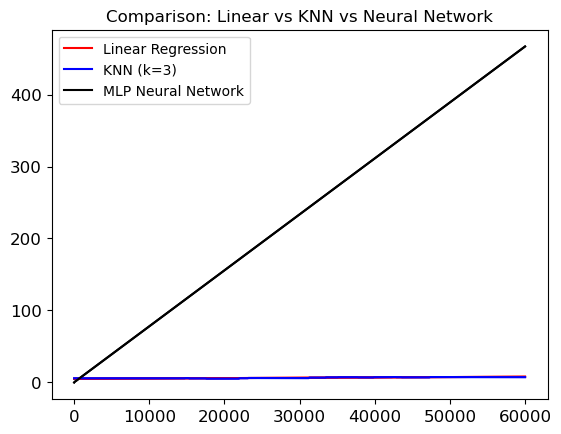


Can MLP scores be compared to linear and KNN scores?
Yes! All three models use R² (coefficient of determination) as their scoring method.
R² measures how well the model explains the variance in the data (1.0 = perfect fit).

Why is the MLP performing so poorly?
The MLP has a negative R² score, meaning it's worse than just predicting the mean!
Problem: GDP values (22,000+) are too large for neural networks.
Neural networks expect input data in range [0,1] or [-1,1].


In [56]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Predict value for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred_mlp_cyprus = mlp.predict(X_new)
print(f"MLP prediction for Cyprus: {y_pred_mlp_cyprus[0]:.2f}")

# Solusion for Qd
# Get the score
mlp_score = mlp.score(X, y.ravel())
print(f"MLP R² score: {mlp_score:.3f}")

# Compare all three models
print(f"\nComparison:")
print(f"Linear regression - Cyprus: {y_pred[0][0]:.2f}, R² score: {model.score(X, y):.3f}")
y_pred_knn_cyprus = knn.predict(X_new)
print(f"KNN (k=3) - Cyprus: {y_pred_knn_cyprus[0]:.2f}, R² score: {knn.score(X, y.ravel()):.3f}")
print(f"MLP - Cyprus: {y_pred_mlp_cyprus[0]:.2f}, R² score: {mlp_score:.3f}")

# Add labels to the plot
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP Neural Network")
plt.legend()
plt.title("Comparison: Linear vs KNN vs Neural Network")
plt.show()

print(f"\nCan MLP scores be compared to linear and KNN scores?")
print(f"Yes! All three models use R² (coefficient of determination) as their scoring method.")
print(f"R² measures how well the model explains the variance in the data (1.0 = perfect fit).")

print(f"\nWhy is the MLP performing so poorly?")
print(f"The MLP has a negative R² score, meaning it's worse than just predicting the mean!")
print(f"Problem: GDP values (22,000+) are too large for neural networks.")
print(f"Neural networks expect input data in range [0,1] or [-1,1].")
